In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
import pickle
from scipy.stats import gaussian_kde

output_path = f'/Users/fnoic/Library/CloudStorage/Dropbox/Apps/Overleaf/PC2MODEL_2024_Noichl/'

In [ ]:
data = {
    1: (403.3, 146.2, 46737),
    2: (328.9, 155.8, 37400),
    3: (414.2, 162.2, 39532),
    4: (479.8, 183.6, 40382),
    5: (379.1, 134.9, 18610),
    6: (434.0, 169.5, 19121),
    7: (345.1, 154.9, 44498),
    8: ()
}

In [ ]:
path = '/Users/fnoic/Downloads/combo.txt'
with open(path, 'r') as f:
    # load txt with pandas, first row is header
    data_loaded = pd.read_csv(f, sep=' ', header=0)
    
# rename column 1 to X
data_loaded.rename(columns={'//X': 'X'}, inplace=True)
# drop Original_cloud_index
data_loaded.drop(columns=['Original_cloud_index'], inplace=True)
# remove duplicates
print(data_loaded.shape)
data_loaded.drop_duplicates(inplace=True)
print(data_loaded.shape)
data_loaded.head()

In [19]:
# identify unique values in column Scalar_field
inst_ids = data_loaded['Scalar_field'].unique()
eval = pd.DataFrame(columns=['id', 'mean', 'std', 'median', 'num_points'])
for inst_id in inst_ids:
    data = data_loaded[data_loaded['Scalar_field'] == inst_id]
    nn_mean = data['Number_of_neighbors_(r=0.1)'].mean()
    nn_std = data['Number_of_neighbors_(r=0.1)'].std()
    nn_median = data['Number_of_neighbors_(r=0.1)'].median()
    num_points = len(data)
    # write to eval, not append
    eval.loc[len(eval)] = [inst_id, nn_mean, nn_std, nn_median, num_points]
    # print(f'Instance {inst_id} has mean {nn_mean}, std {nn_std}, median {nn_median}')

In [54]:
# smallest number of points
print('smallest number of points: ', eval[eval['num_points'] == eval['num_points'].min()][['id', 'num_points']])
# largest number of points
print('largest number of points: ', eval[eval['num_points'] == eval['num_points'].max()][['id', 'num_points']])
# smallest mean
print('smallest mean: ', eval[eval['mean'] == eval['mean'].min()][['id', 'mean']])
# largest mean
print('largest mean: ', eval[eval['mean'] == eval['mean'].max()][['id', 'mean']])
# smallest std
print('smallest std: ', eval[eval['std'] == eval['std'].min()][['id', 'std']])
# largest std
print('largest std: ', eval[eval['std'] == eval['std'].max()][['id', 'std']])

smallest number of points:        id  num_points
16  17.0      1213.0
largest number of points:      id  num_points
8  9.0     58232.0
smallest mean:        id        mean
15  16.0  123.838146
largest mean:      id        mean
3  4.0  479.796593
smallest std:        id        std
17  18.0  52.111382
largest std:        id         std
10  11.0  219.695172


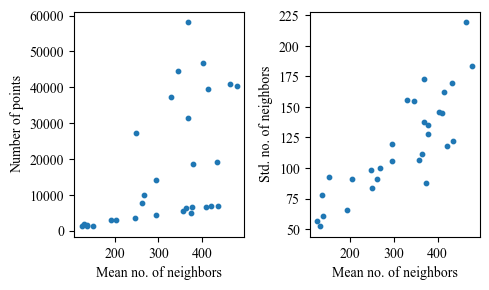

In [57]:
# make the two scatter plots in one, as subplots next to each other
fig, axs = plt.subplots(1, 2)
axs[0].scatter(eval['mean'], eval['num_points'], s=10)
axs[0].set_xlabel('Mean no. of neighbors')
axs[0].set_ylabel('Number of points')
axs[1].scatter(eval['mean'], eval['std'], s=10)
axs[1].set_xlabel('Mean no. of neighbors')
axs[1].set_ylabel('Std. no. of neighbors')
# change size of figure
fig.set_size_inches(5, 3)
# increase space between subplots
plt.tight_layout()
# to pdf
plt.savefig('scatter_mean_num_points_std.pdf')
plt.show()

## load cloud for visualization

In [40]:
cloudpath = '/Users/fnoic/PycharmProjects/reconstruct/data/parking/cache_cloud_2.pickle'
with (open(cloudpath, 'rb') as f):
    cloud = pickle.load(f)
# Set font to Times New Roman for all text
rcParams['font.family'] = 'Times New Roman'
rcParams['font.sans-serif'] = ['Times New Roman']
rcParams['font.size'] = 12
# set times new roman for math font as well
rcParams['mathtext.fontset'] = 'cm'



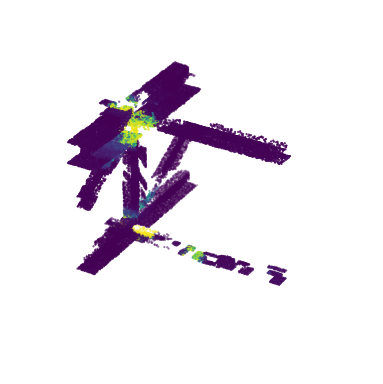

In [45]:
# plot cloud with colors for confidence
fig = plt.figure(figsize=(7, 4))
ax = fig.add_subplot(111, projection='3d')

# Create the scatter plot
scatter = ax.scatter(cloud['x'], cloud['y'], cloud['z'], s=0.3, c=cloud['supernormal_dev_gt'], cmap='viridis')

# no grid
ax.grid(False)
# no axes
ax.axis('off')

# Adjust layout to prevent cutting off labels
plt.tight_layout()

plt.savefig(f'{output_path}supernormal_gt_deviation.pdf', bbox_inches='tight', dpi=300)
plt.savefig(f'{output_path}supernormal_gt_deviation.png', bbox_inches='tight', dpi=300)
plt.show()

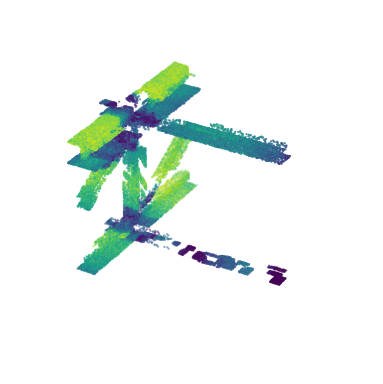

In [35]:
### PLOT cloud with colors for supernormal deviation
# plot cloud with confidence colors
fig = plt.figure(figsize=(7, 4))
ax = fig.add_subplot(111, projection='3d')

# Create the scatter plot
scatter = ax.scatter(cloud['x'], cloud['y'], cloud['z'], s=0.3, c=cloud['confidence'], cmap='viridis')

# no grid
ax.grid(False)
# no axes
ax.axis('off')

# Adjust layout to prevent cutting off labels
plt.tight_layout()

plt.savefig(f'{output_path}confidence.pdf', bbox_inches='tight', dpi=300)
plt.savefig(f'{output_path}confidence.png', bbox_inches='tight', dpi=300)
plt.show()

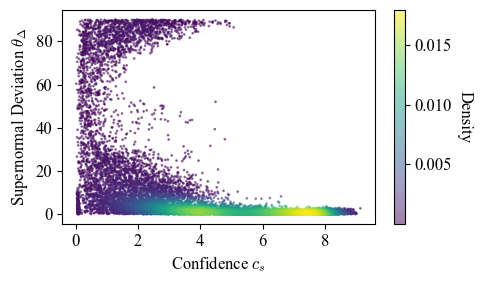

In [42]:
# plot scatter plot of confidence vs supernormal deviation
x = cloud['confidence']
y = cloud['supernormal_dev_gt']
x = np.array(x, dtype=np.float64)
y = np.array(y, dtype=np.float64)

xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

fig, ax = plt.subplots(figsize=(5, 3))

# Scatter plot with color representing density
scatter = ax.scatter(x, y, c=z, cmap='viridis', s=1, alpha=0.5)

# Set y-axis to logarithmic scale
# ax.set_yscale('log')

# Label axes with LaTeX math notation
ax.set_xlabel(r'Confidence $c_s$')
ax.set_ylabel(r'Supernormal Deviation $\theta_\Delta$')

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Density', rotation=270, labelpad=15)

# Adjust layout to prevent cutting off labels
plt.tight_layout()

plt.savefig(f'{output_path}confidence_vs_supernormal_deviation.pdf', bbox_inches='tight', dpi=300)
plt.savefig(f'{output_path}confidence_vs_supernormal_deviation.png', bbox_inches='tight', dpi=300)
plt.show()

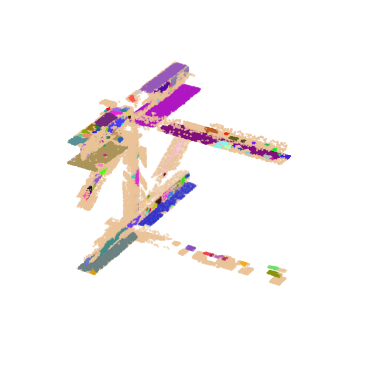

In [49]:
# plot cloud with colors from ransac_patch
fig = plt.figure(figsize=(7, 4))
ax = fig.add_subplot(111, projection='3d')

patch = cloud['ransac_patch']
patch_ids = np.unique(patch)
# for each patch id pick a random color
colors = np.random.rand(len(patch_ids), 3)
color_dict = {patch_id: color for patch_id, color in zip(patch_ids, colors)}
color = [color_dict[patch_id] for patch_id in patch]


# Create the scatter plot
scatter = ax.scatter(cloud['x'], cloud['y'], cloud['z'], s=0.3, c=color)

# no grid
ax.grid(False)
# no axes
ax.axis('off')

# Adjust layout to prevent cutting off labels
plt.tight_layout()

plt.savefig(f'{output_path}ransac_patch.pdf', bbox_inches='tight', dpi=300)
plt.savefig(f'{output_path}ransac_patch.png', bbox_inches='tight', dpi=300)
plt.show()
